In [10]:
from cast_to_xarray import *
import cartopy.crs as ccrs
import cartopy.feature as cf

In [11]:
data_dir = 'data_cruise2'

cast6xr = cast_to_xarray(data_dir+'/station6_loop_filter_teos10_bin.cnv', '6')
cast7xr = cast_to_xarray(data_dir+'/station7_loop_filter_teos10_bin.cnv', '7')
cast8xr = cast_to_xarray(data_dir+'/station8_loop_filter_teos10_bin.cnv', '8')
cast9xr = cast_to_xarray(data_dir+'/slope_loop_filter_teos10_bin.cnv', '9')
cast2xr = cast_to_xarray(data_dir+'/station2_loop_filter_teos10_bin.cnv', '2')

castFISxr = cast_to_xarray(data_dir+'/FIS_loop_filter_teos10_bin.cnv', 'FIS')
castLGxr = cast_to_xarray(data_dir+'/littlegull_loop_filter_teos10_bin.cnv', 'LG')
castRACExr = cast_to_xarray(data_dir+'/race_loop_filter_teos10_bin.cnv', 'Race')
castWFLTxr = cast_to_xarray(data_dir+'/WFLite_loop_filter_teos10_bin.cnv', 'WFL')
castWFxr = cast_to_xarray(data_dir+'/WF_loop_filter_teos10_bin.cnv', 'WF')

In [12]:
# which casts to include

# !!! SPECIFY CRUISE ORDER HERE !!!
castlist = [castWFxr, cast9xr, cast8xr, cast7xr, cast6xr, castWFLTxr, cast2xr, castRACExr, castLGxr, castFISxr]

# combine all the casts into one xarray dataset
ctdsection = xr.concat(castlist,"cast")
#ctdsection

In [13]:
extent = [-73,-70.5,40,42]

# Download ETOPO1 topography for the domain(this may take a minute)
url = 'http://geoport.whoi.edu/thredds/dodsC/bathy/etopo1_bed_g2'
bat = xr.open_dataset(url)
bat = bat.sel(lon=slice(extent[0],extent[1]),lat=slice(extent[2],extent[3]))

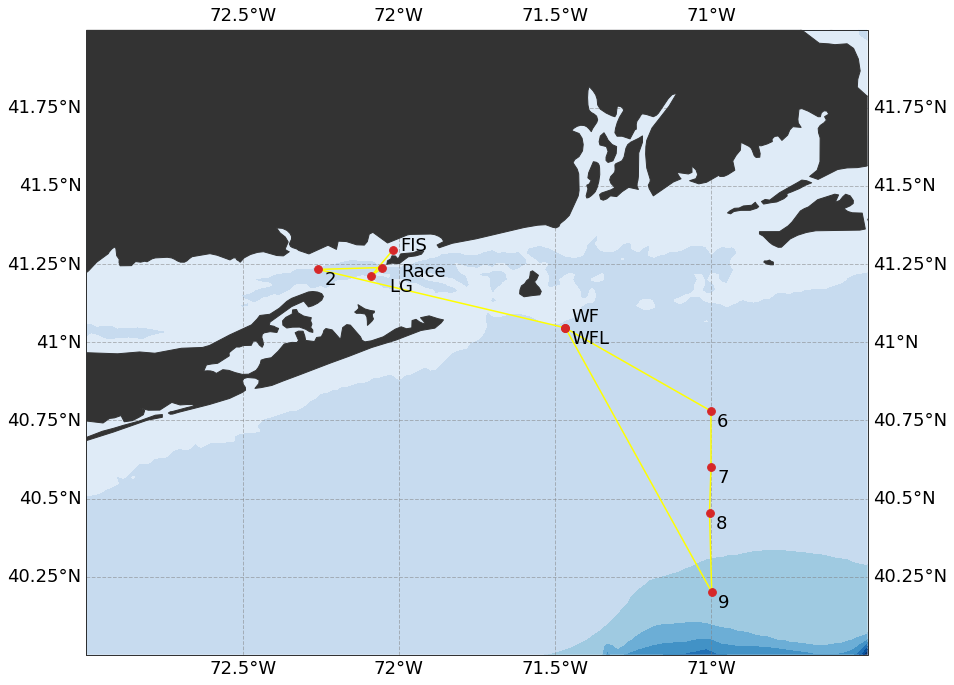

In [14]:
projection = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(14, 17),
                           subplot_kw=dict(projection=projection))
ax.set_extent(extent)

# Plot topography
bat['topo'].plot.contourf(
        ax=ax,levels=np.linspace(-500,100,10),add_colorbar=False,extend='neither',cmap='Blues_r',transform=projection)

_ = ax.add_feature(cf.NaturalEarthFeature('physical', 'land', '10m',
                                                edgecolor='face', facecolor='0.2'),
                                                zorder=3)

plt.plot(ctdsection.longitude.values,ctdsection.latitude.values, color=([1, 1, 0]))

# plot CTD stations
ctdsection.plot.scatter('longitude', 'latitude', color='tab:red',transform=projection, s=60, zorder=3)

plt.text(ctdsection.longitude.values[0]+.02,ctdsection.latitude.values[0]+.02,ctdsection.station.values[0],color='k',transform=projection,zorder=5)
plt.text(ctdsection.longitude.values[1]+.02,ctdsection.latitude.values[1]-.05,ctdsection.station.values[1],color='k',transform=projection,zorder=5)
plt.text(ctdsection.longitude.values[2]+.02,ctdsection.latitude.values[2]-.05,ctdsection.station.values[2],color='k',transform=projection,zorder=5)
plt.text(ctdsection.longitude.values[3]+.02,ctdsection.latitude.values[3]-.05,ctdsection.station.values[3],color='k',transform=projection,zorder=5)
plt.text(ctdsection.longitude.values[4]+.02,ctdsection.latitude.values[4]-.05,ctdsection.station.values[4],color='k',transform=projection,zorder=5)
plt.text(ctdsection.longitude.values[5]+.02,ctdsection.latitude.values[5]-.05,ctdsection.station.values[5],color='k',transform=projection,zorder=5)

#WFL
plt.text(ctdsection.longitude.values[6]+.02,ctdsection.latitude.values[6]-.05,ctdsection.station.values[6],color='k',transform=projection,zorder=5)

plt.text(ctdsection.longitude.values[7]+.06,ctdsection.latitude.values[7]-.03,ctdsection.station.values[7],color='k',transform=projection,zorder=5)
plt.text(ctdsection.longitude.values[8]+.06,ctdsection.latitude.values[8]-.05,ctdsection.station.values[8],color='k',transform=projection,zorder=5)
plt.text(ctdsection.longitude.values[9]+.025,ctdsection.latitude.values[9],ctdsection.station.values[9],color='k',transform=projection,zorder=5)

gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')

plt.rcParams.update({'font.size': 18})

plt.savefig("Cruise2_map.png")